# House Price Study Notebook

## Objectives

*   Answer business requirement 1: 
    * The client is interested in discovering how house attributes correlate with sale prices. Therefore, the client expects data visualizations of the correlated variables against the sale price.

## Inputs

* outputs/datasets/collection/house_prices_records.csv

## Outputs

* generate code that answers business requirement 1 and can be used to build the Streamlit App






---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir


'/workspaces/heritage-housing/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspaces/heritage-housing'

---

# Load Data

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/house_prices_records.csv"))
df


1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0        856.0     854.0           3.0           No       706.0          GLQ   
1       1262.0       0.0           3.0           Gd       978.0          ALQ   
2        920.0     866.0           3.0           Mn       486.0          GLQ   
3        961.0       NaN           NaN           No       216.0          ALQ   
4       1145.0       NaN           4.0           Av       655.0          GLQ   
...        ...       ...           ...          ...         ...          ...   
1455     953.0     694.0           3.0           No         0.0          Unf   
1456    2073.0       0.0           NaN           No       790.0          ALQ   
1457    1188.0    1152.0           4.0           No       275.0          GLQ   
1458    1078.0       0.0           2.0           Mn        49.0          NaN   
1459    1256.0       0.0           3.0           No       830.0          BLQ   

      BsmtUnfSF  EnclosedPorch  GarageArea GarageFinish  ...  LotFrontage  \
0         150.0            0.0       548.0          RFn  ...         65.0   
1         284.0            NaN       460.0          RFn  ...         80.0   
2         434.0            0.0       608.0          RFn  ...         68.0   
3         540.0            NaN       642.0          Unf  ...         60.0   
4         490.0            0.0       836.0          RFn  ...         84.0   
...         ...            ...         ...          ...  ...          ...   
1455      953.0            NaN       460.0          RFn  ...         62.0   
1456      589.0            NaN       500.0          Unf  ...         85.0   
1457      877.0            NaN       252.0          RFn  ...         66.0   
1458        0.0          112.0       240.0          Unf  ...         68.0   
1459      136.0            0.0       276.0          Fin  ...         75.0   

      MasVnrArea OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  \
0          196.0        61.0            5            7        856.0   
1            0.0         0.0            8            6       1262.0   
2          162.0        42.0            5            7        920.0   
3            0.0        35.0            5            7        756.0   
4          350.0        84.0            5            8       1145.0   
...          ...         ...          ...          ...          ...   
1455         0.0        40.0            5            6        953.0   
1456       119.0         0.0            6            6       1542.0   
1457         0.0        60.0            9            7       1152.0   
1458         0.0         0.0            6            5       1078.0   
1459         0.0        68.0            6            5       1256.0   

      WoodDeckSF  YearBuilt  YearRemodAdd  SalePrice  
0            0.0       2003          2003     208500  
1            NaN       1976          1976     181500  
2            NaN       2001          2002     223500  
3            NaN       1915          1970     140000  
4            NaN       2000          2000     250000  
...          ...        ...           ...        ...  
1455         0.0       1999          2000     175000  
1456         NaN       1978          1988     210000  
1457         NaN       1941          2006     266500  
1458         NaN       1950          1996     142125  
1459       736.0       1965          1965     147500  

[1460 rows x 24 columns]

----

# Data Exploration

Check variable type, distribution and missing levels.

In [5]:
from pandas_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

----

# Data Correlation Study

We map the categorical columns into numerical values, to make further studies easier.

In [5]:
# Define the mapping for categorical columns
cat_mappings = {
    'BsmtExposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0},
    'BsmtFinType1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0},
    'GarageFinish': {'Fin': 3, 'RFn': 2, 'Unf': 1, 'None': 0},
    'KitchenQual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
}

# Apply mappings to the categorical columns
for column, mapping in cat_mappings.items():
    df[column] = df[column].map(mapping)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   float64
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1460 non-null   int64  
 4   BsmtFinSF1     1460 non-null   float64
 5   BsmtFinType1   1346 non-null   float64
 6   BsmtUnfSF      1460 non-null   float64
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   float64
 9   GarageFinish   1298 non-null   float64
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   float64
 12  KitchenQual    1460 non-null   int64  
 13  LotArea        1460 non-null   float64
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   float64
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

Investigate correlation between attributes and SalePrice. 

First we drop all zero and empty values. If column has a correlation of 0.6 or higher, we save it to a list.

In [18]:
import numpy as np

vars_to_study = []
vars_to_study_list = []

# Iterate over columns
for col in df.columns:
    # Exclude 'SalePrice' column
    if col != 'SalePrice':
        # Drop rows with zero or missing values
        df_filtered = df.replace(0, np.nan).dropna(subset=[col])
        
        # Calculate correlation with 'SalePrice'
        corr = df_filtered[col].corr(df_filtered['SalePrice'])
    
        # Save the top correlated columns
        if abs(corr) >= 0.6:
            vars_to_study.append((col, corr))
            vars_to_study_list.append((col))

print("Top correlated variables to SalePrice:")

# Print the variables and their correlations
for col, corr in vars_to_study:
    print(f"{col:<15}{corr:.1f}")

Top correlated variables to SalePrice:
1stFlrSF       0.6
2ndFlrSF       0.7
GarageArea     0.6
GrLivArea      0.7
KitchenQual    0.7
OverallQual    0.8
TotalBsmtSF    0.6


In [19]:
vars_to_study_list

['1stFlrSF',
 '2ndFlrSF',
 'GarageArea',
 'GrLivArea',
 'KitchenQual',
 'OverallQual',
 'TotalBsmtSF']

We plot the distribution of 'vars_to_study' on a heatmap to visualize the correlation.

In [10]:
%matplotlib inline

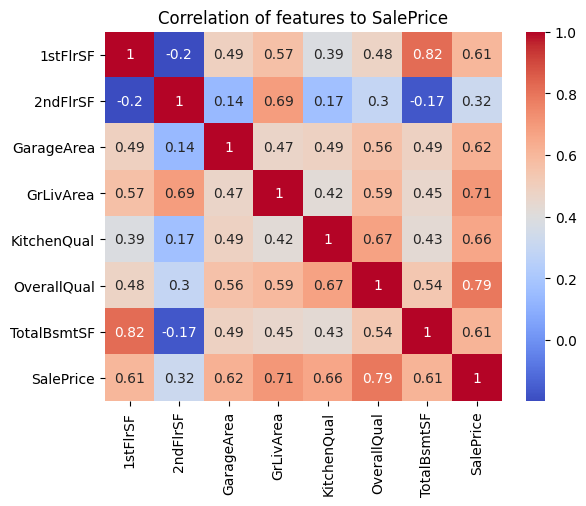

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()

vars_to_study_list.append('SalePrice')

# Plot the heat map
sns.heatmap(df[vars_to_study_list].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of features to SalePrice")
plt.show()

# Remove SalePrice from vars_to_study
vars_to_study_list.remove('SalePrice')


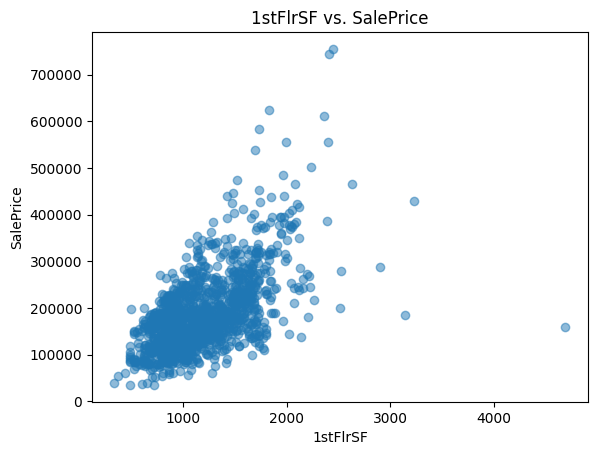

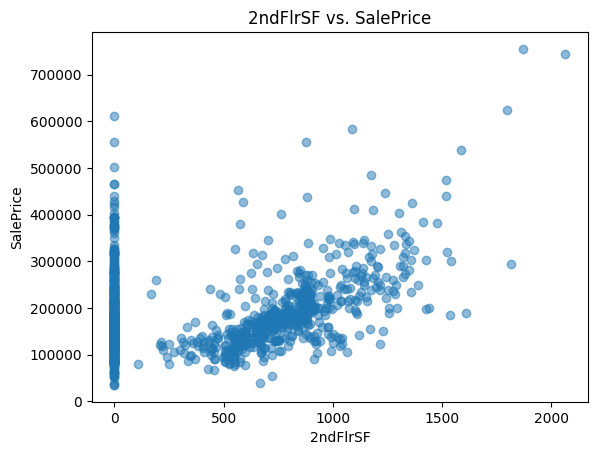

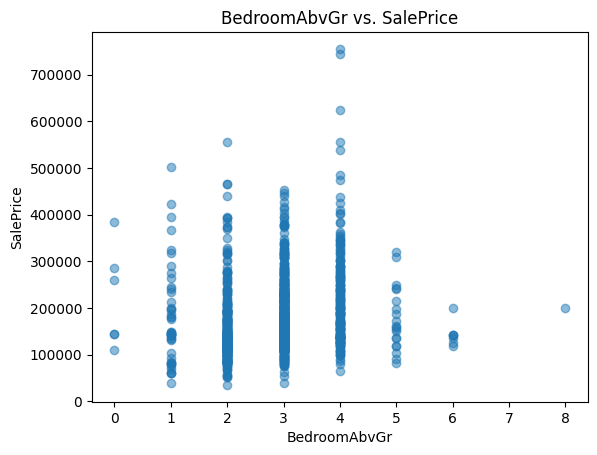

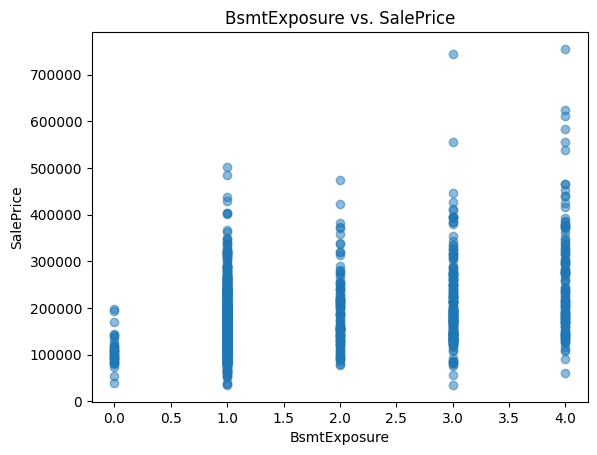

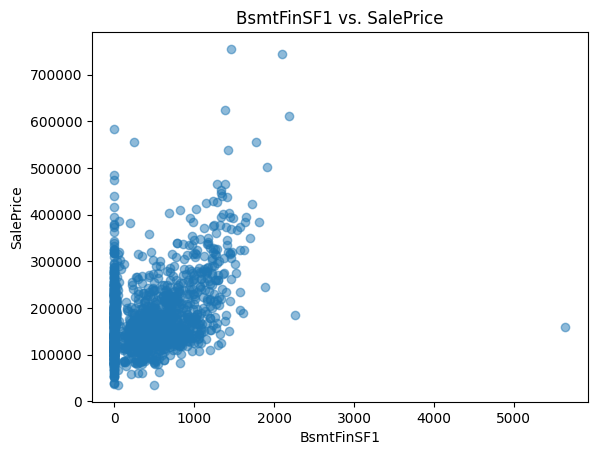

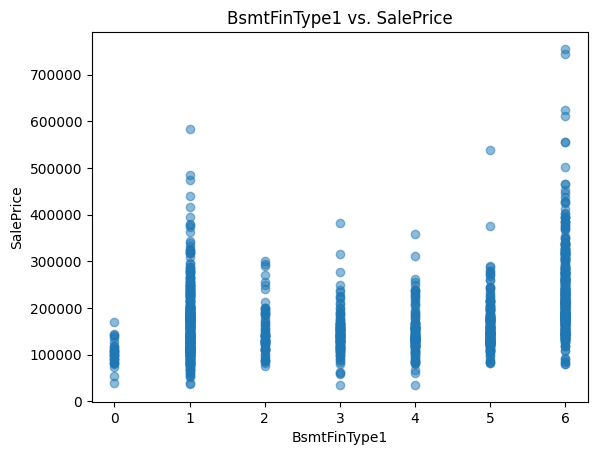

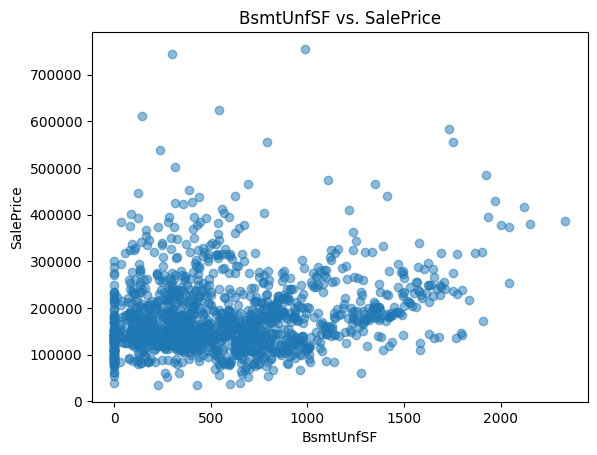

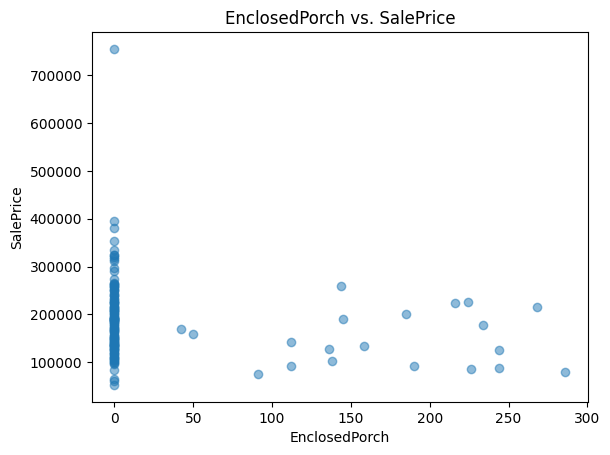

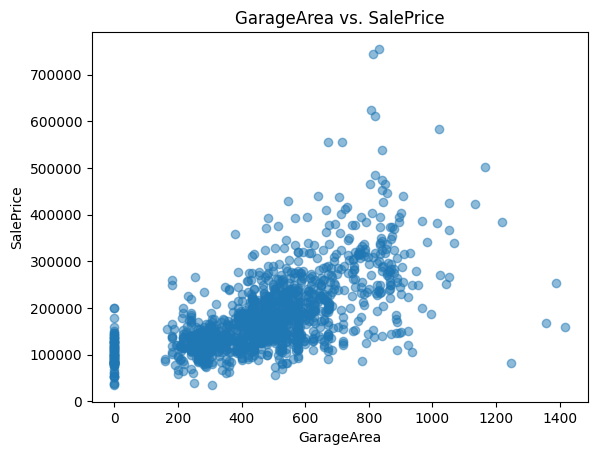

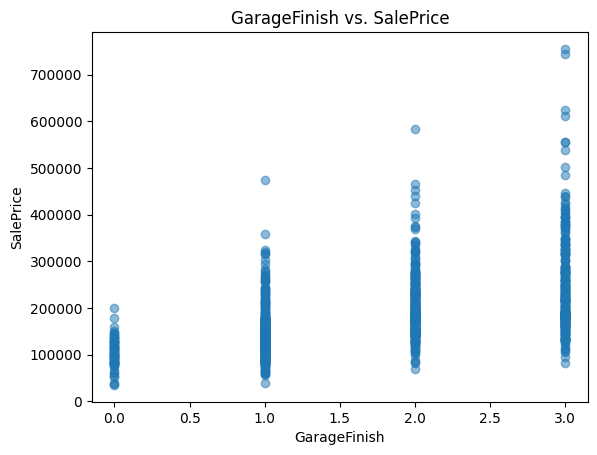

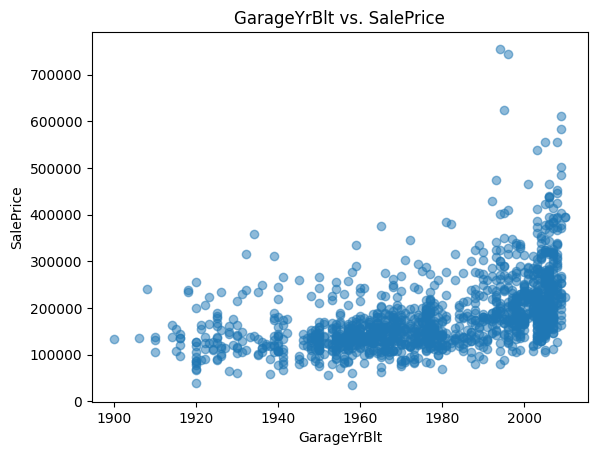

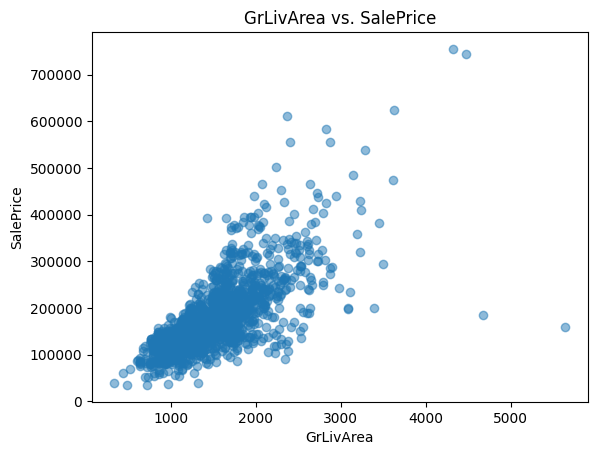

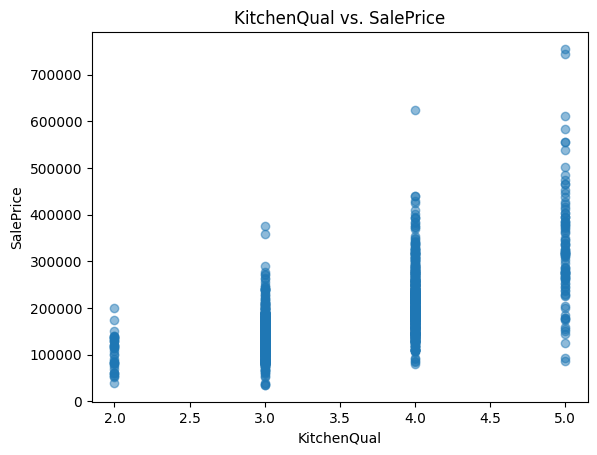

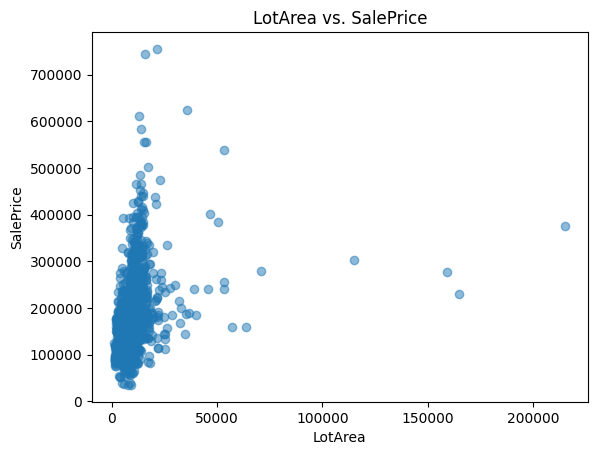

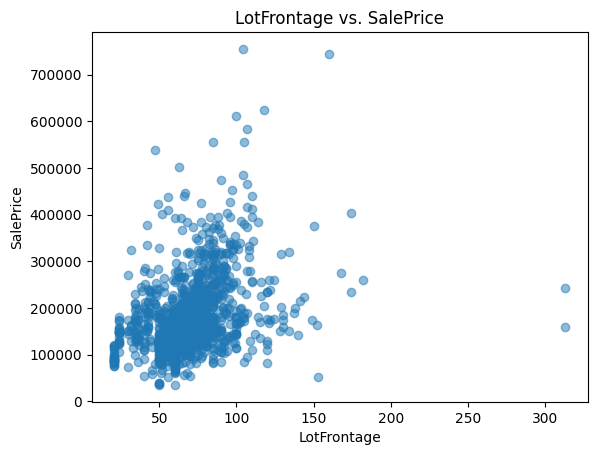

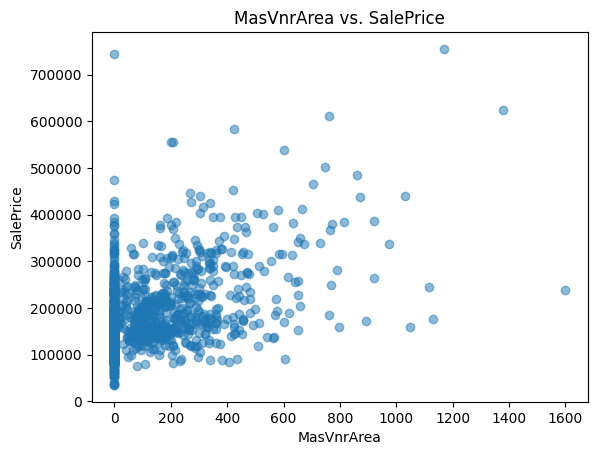

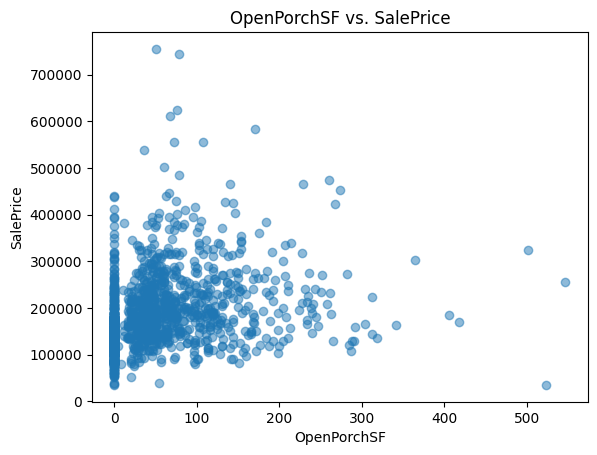

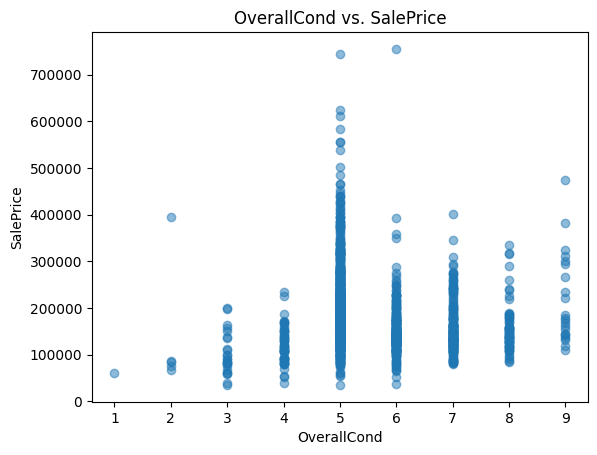

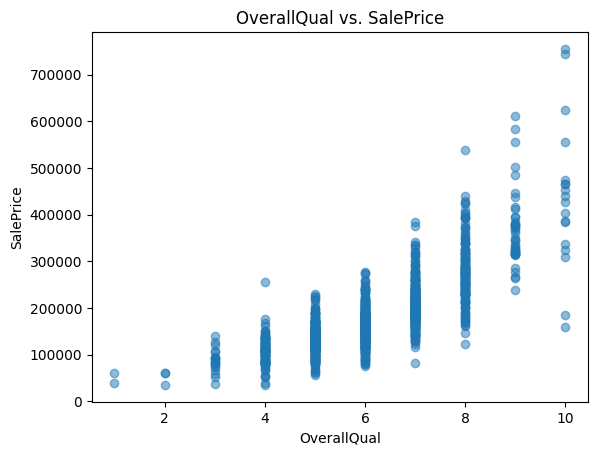

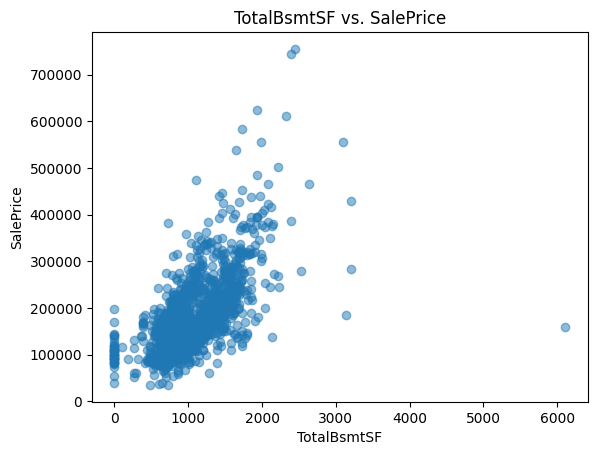

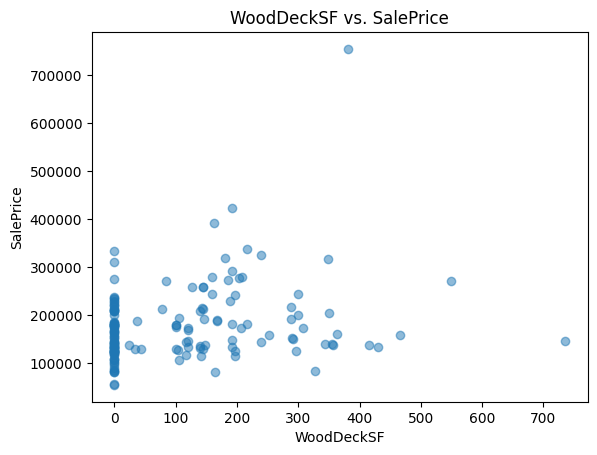

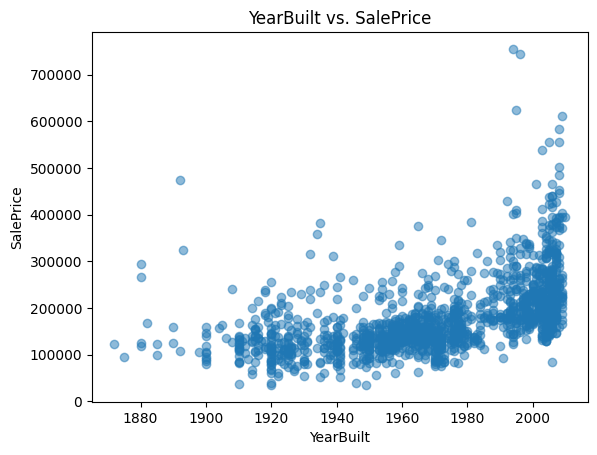

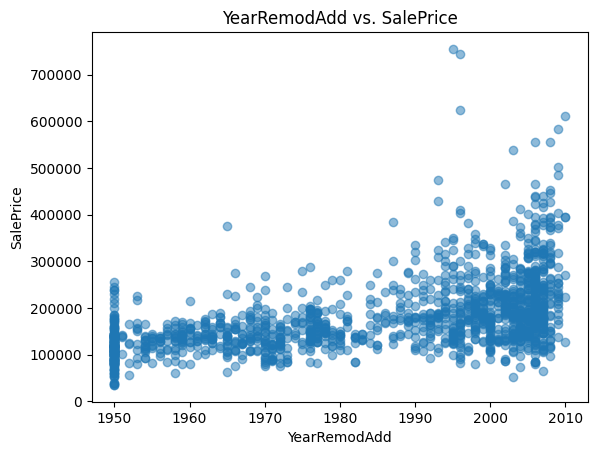

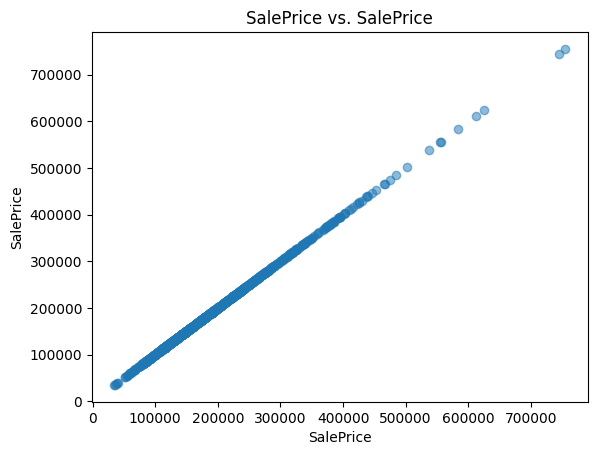

In [24]:
import matplotlib.pyplot as plt

# create scatterplots showing the relationship between each variable and SalePrice
for var in df:

    # Exclude rows with zero values
    df_filtered = df[(np.abs(df[var]) > 0) & df['SalePrice'].notnull()]
    plt.figure()
    plt.scatter(df[var], df['SalePrice'], alpha=0.5)
    plt.xlabel(var)
    plt.ylabel('SalePrice')
    plt.title(f'{var} vs. SalePrice')
    plt.show()


----

# Conclusions and Next steps

The house attributes that have a high correlation with sale price are, in decending order:

1stFlrSF       0.6
2ndFlrSF       0.7
GarageArea     0.6  * Size of garage
GrLivArea      0.7  * Size of ground floor living area
KitchenQual    0.7  * Quality of kitchen
OverallQual    0.8  * Overall quality of the house
TotalBsmtSF    0.6  *Total si






Next step is to display these plots on the dashboard in order to answer Business Requirement #1